<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/Project4_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project outline

>- 1) import libraries
>- 2) Define Project
>- 3) Import Data, get basic statistics, shape of data, sum of missing vaules, and variable types
>- 4) Preprocessing the data for the models
>- 5) EDA
>- 6) Transform data if needed
>- 7) Define functions for model analyis 
    - Confusion Matrix
    - Scoring function to display metrics of parameters
>- 8) Define feature matrices & Split model into testing and training data
>- 9) Instantiate model, fit and score base models, then compare each one with dataframe
>- 10) Hypertune models 
>- 11) Conclusion and business insight.

1) Import Libraries for model and for scoring metrics used to score models

In [ ]:
#set-up model and import libraries


# import libraries as needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# we want our plots to aapear inside the notebook
%matplotlib inline 


# models from scikit-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn import metrics
# model evaluations

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

from xgboost import XGBClassifier

## 2) Define Project 

- You as a data scientist have been tasked with the problem to provide reccomendations for the wellness customers that will purchase the travel package. Analyze the customer data to assist the marketing team out with wellness tourism package. 
 - Outcome: Predict which customer is more likely to purchase the newly introduced travel package

### Data Dict

- CustomerID	Unique customer ID
- ProdTaken	Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age:	Age of customer
- TypeofContact:	How customer was contacted (Company Invited or Self Inquiry)
- CityTier:	City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- DurationOfPitch:	Duration of the pitch by a salesperson to the customer
- Occupation:	Occupation of customer
- Gender:	Gender of customer
- NumberOfPersonVisiting:	Total number of persons planning to take the trip with the customer
- NumberOfFollowups:	Total number of follow-ups has been done by sales person after sales pitch
- ProductPitched:	Product pitched by the salesperson
- PreferredPropertyStar:	Preferred hotel property rating by customer
- MaritalStatus:	Marital status of customer
- NumberOfTrips:	Average number of trips in a year by customer
- Passport:	The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore:	 Sales pitch satisfaction score
- OwnCar:	Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting:	Total number of children with age less than 5 planning to take the trip with the customer
- Designation:	Designation of the customer in the current organization
- MonthlyIncome:	Gross monthly income of the customer

### 3) Import Data, get basic statistics, shape of data, sum of missing vaules, and variable types

In [ ]:
data = pd.read_csv("Tourism.csv")

In [ ]:
data.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3641,203641,0,21.0,Self Enquiry,3,16.0,Salaried,Male,3,4.0,Basic,5.0,Unmarried,3.0,0,1,0,2.0,Executive,21406.0
1011,201011,0,36.0,Self Enquiry,3,9.0,Small Business,Fe Male,2,3.0,Deluxe,4.0,Unmarried,4.0,1,4,0,1.0,Manager,24278.0
2196,202196,0,NaN,Company Invited,1,6.0,Salaried,Female,3,3.0,Deluxe,5.0,Married,2.0,0,5,1,0.0,Manager,NaN
4660,204660,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,2.0,VP,38651.0
3169,203169,1,36.0,Self Enquiry,1,21.0,Salaried,Male,3,5.0,Basic,4.0,Married,3.0,1,5,1,2.0,Executive,22421.0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [ ]:
data.info()
# determine data types and non-null counts 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
# according to the above code there are some null values in Age, TypeofContact, DurationofPitch, 
# NumberofFollowups, Preferred property Star, number of trips, numberofchildrenvisting, monthlyincome

In [ ]:
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [ ]:
# from the data dataframe, sum all the null values and sort the values descending

4) Preprocessing the data for the models
- Change object string datatypes into categorical variables 
- Encode values in categorical variables with dict and use replace() function to map dict keys(colunmns) along with 
dict values(column indexes) column index values are mapped according to  possible values that were determined by using value_counts function to to determine the values in the categorical columns and encode them numerically.
-

In [ ]:
# preprocess data, take care of null values, convert object data types to categories

categorical_variables = ["TypeofContact","Occupation","Gender","ProductPitched",
                        "MaritalStatus","Designation"
                        ]
for categories in categorical_variables:
    data[categories] = data[categories].astype('category')

# loop through each coulumn in categorical_variables list and change dtype to category instead of object.    
    
data.info()

# verify the data has been changed to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [ ]:

 
# loop through non numeric columns and print out each possible categorical value 
# for each column
        
for label, content in data.items():
    if  not pd.api.types.is_numeric_dtype(content):
        print(label,data[label].value_counts())
        print("")


TypeofContact Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Occupation Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Gender Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

ProductPitched Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

MaritalStatus Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Designation Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



### replace structure of categorical colunmns to encode them as numerical data for the model

In [ ]:
for label, content in data.items():
    if  not pd.api.types.is_numeric_dtype(content):
        print(label)
# determine the the non numeric data by looping through each column and index values by using the data.items() method

TypeofContact
Occupation
Gender
ProductPitched
MaritalStatus
Designation


In [ ]:
# Define dict of each columnn to map/encode to values that associate with each state in the categorical variable

replace_dict = {
    "TypeofContact" : {"Self Enquiry" : 1, "Company Invited" : 2 },
    "Occupation" : {"Salaried" : 1, "Small Business" : 2, "Large Business" : 3, "Free Lancer" : 4 },
    "Gender" : {"Female":1, "Fe Male":1,"Male":2},
    "ProductPitched" : {"Basic" : 0, "Deluxe" : 1, "Standard" : 2  , "Super Deluxe": 3, "King" : 4 },
    "MaritalStatus" : {"Divorced": 1, "Single" : 2, "Unmarried" : 3, "Married" : 4},
    "Designation" : {"Executive" : 1, "Manager" : 2, "Senior Manager" : 3, "AVP" : 4, "VP" : 5}
}

In [ ]:
data=data.replace(replace_dict)
# Encode data from dict in datframe
# one hot encoding will not need to be used

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
TypeofContact,4863.0,1.291795,0.454635,1.0,1.00,1.0,2.00,2.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
Occupation,4888.0,1.605155,0.647349,1.0,1.00,2.0,2.00,4.0
Gender,4888.0,1.596563,0.490637,1.0,1.00,2.0,2.00,2.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0


In [ ]:
data.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2368,202368,0,43.0,1.0,1,9.0,1,2,3,5.0,4,3.0,4,4.0,0,5,1,NaN,5,34740.0
2112,202112,0,38.0,1.0,3,15.0,2,2,3,4.0,0,4.0,4,1.0,0,4,0,2.0,1,17899.0
343,200343,0,29.0,1.0,3,16.0,2,1,2,4.0,1,4.0,4,2.0,1,5,0,1.0,2,23268.0
4335,204335,1,30.0,1.0,1,32.0,3,1,4,5.0,0,4.0,4,7.0,0,3,1,3.0,1,21224.0
3944,203944,0,34.0,1.0,1,9.0,2,2,4,4.0,0,3.0,2,6.0,0,3,0,3.0,1,21174.0


In [ ]:
for label, content in data.items():
    if  not pd.api.types.is_numeric_dtype(content):
        print(label,data[label].value_counts())
        print("")
        
# verify no non-numeric data columns exist in the data frame

In [ ]:
data.info()
# verify all the data variables are int or float dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   float64
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   int64  
 7   Gender                    4888 non-null   int64  
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   int64  
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   int64  
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

#### after processing the data through replace_struct. we see that all the columns are now int or float dtype
- Next: Process missing values by either imputing median or using npnan

In [ ]:
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [ ]:
# After the mapping of each columns with values for the categorical varaibles, the results are viewed above. 

In [ ]:
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

CustomerID
ProdTaken
Age
TypeofContact
CityTier
DurationOfPitch
Occupation
Gender
NumberOfPersonVisiting
NumberOfFollowups
ProductPitched
PreferredPropertyStar
MaritalStatus
NumberOfTrips
Passport
PitchSatisfactionScore
OwnCar
NumberOfChildrenVisiting
Designation
MonthlyIncome


In [ ]:
tmp_data = data.copy()
# make copy of the data frame prior to removing null values

In [ ]:
#  Build list of numerical columns to loop over to impute median values
numeric_list = []
for label,content in tmp_data.items(): 
    if pd.api.types.is_numeric_dtype(content):
        numeric_list.append(label)
    

In [ ]:
numeric_list

['ProdTaken',
 'Age',
 'TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'Designation',
 'MonthlyIncome_log',
 'DurationOfPitch_log']

In [ ]:
# take missing values in numeric columns and fill it in with the median value for each column
        
for label, content in tmp_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            tmp_data[label] = content.fillna(content.median())

In [ ]:
tmp_data.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
MaritalStatus               0
MonthlyIncome_log           0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
PreferredPropertyStar       0
Age                         0
ProductPitched              0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
CityTier                    0
TypeofContact               0
DurationOfPitch_log         0
dtype: int64

In [ ]:
tmp_data.describe().T
# look at the basic statistics of the df after the removal of outliers in the tmp_data

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4884.0,0.188370,0.391048,0.000000,0.000000,0.000000,0.000000,1.000000
Age,4884.0,37.547297,9.108467,18.000000,31.000000,36.000000,43.000000,61.000000
TypeofContact,4884.0,1.290541,0.454058,1.000000,1.000000,1.000000,2.000000,2.000000
CityTier,4884.0,1.654791,0.916767,1.000000,1.000000,1.000000,3.000000,3.000000
Occupation,4884.0,1.604832,0.646883,1.000000,1.000000,2.000000,2.000000,4.000000
Gender,4884.0,1.597052,0.490541,1.000000,1.000000,2.000000,2.000000,2.000000
NumberOfPersonVisiting,4884.0,2.905405,0.724953,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfFollowups,4884.0,3.710893,0.998440,1.000000,3.000000,4.000000,4.000000,6.000000
ProductPitched,4884.0,1.056511,1.108898,0.000000,0.000000,1.000000,2.000000,4.000000
PreferredPropertyStar,4884.0,3.578010,0.796943,3.000000,3.000000,3.000000,4.000000,5.000000


In [ ]:
data.describe().T
# identifying skewed data that needs to be transformed to be normalized
# Duration of pitch mean and mean values have a bit of mean and median value separation, data is slightly skewed.
# use log transform to normnalize data
# Monthly Income is very slightly different with respect to mean and median values
# Column will be transformed

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
TypeofContact,4863.0,1.291795,0.454635,1.0,1.00,1.0,2.00,2.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
Occupation,4888.0,1.605155,0.647349,1.0,1.00,2.0,2.00,4.0
Gender,4888.0,1.596563,0.490637,1.0,1.00,2.0,2.00,2.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0


 ### 5) EDA
 - Define functions for univariate and multivariate analysis 
 - use correlation matrix to identify highly correlating variables to target variable
 - identify if any data is skewed and needs to be transformed 

In [ ]:
# define EDA Functions

def distribution_plot_wrt_target(data, predictor, target):
    
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="Blues")

    axs[1, 1].set_title("Boxplot (with flier removed) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Blues",
    )

    plt.tight_layout()
    plt.show()


In [ ]:


# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: show kernel density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

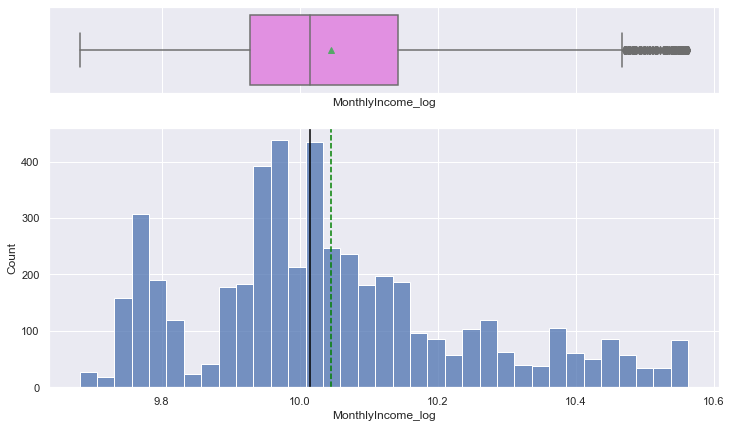

In [ ]:
# univariate analysis 

histogram_boxplot(tmp_data,'MonthlyIncome_log')

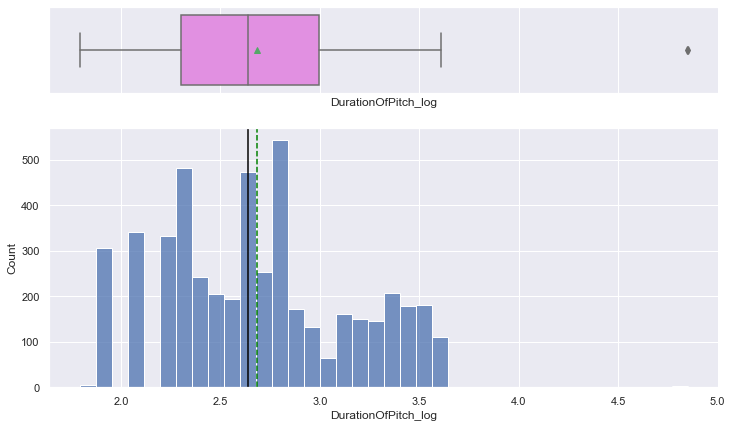

In [ ]:
histogram_boxplot(tmp_data, "DurationOfPitch_log")

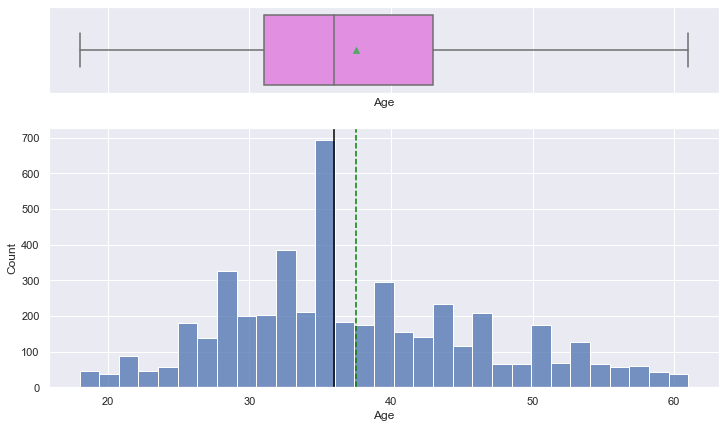

In [ ]:
histogram_boxplot(tmp_data, "Age")

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="PuBu",
        order=data[feature].value_counts(ascending=True).index[:n],
        hue = None
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
category_list = [
"TypeofContact",
"Occupation",
"Gender",
"ProductPitched",
"MaritalStatus",
"Designation"
]

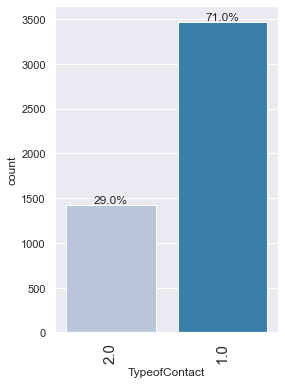

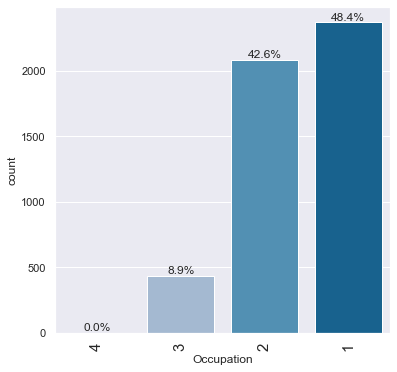

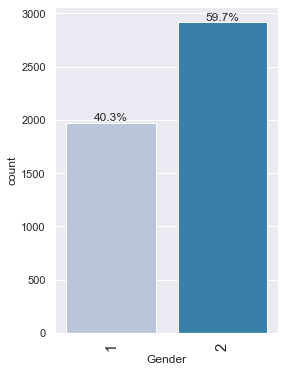

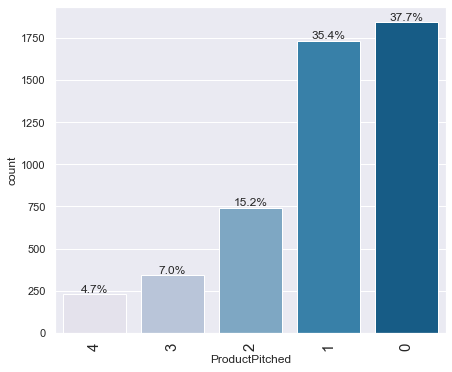

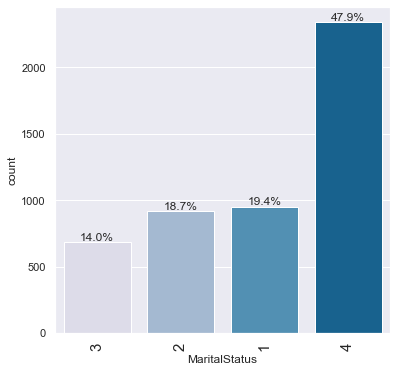

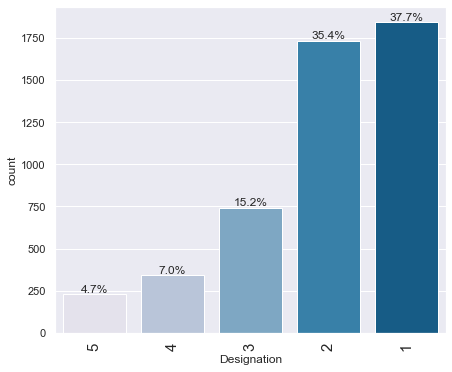

In [ ]:
### Insights about univariate analysis

# loop through each col in category list and output a barplot 
for i in category_list:
    labeled_barplot(tmp_data, i, perc=True, n=None)

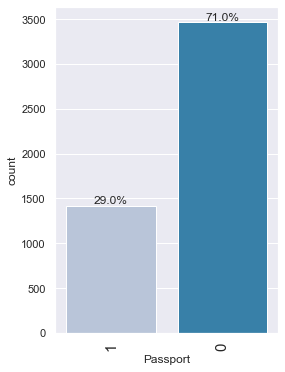

In [ ]:
labeled_barplot(tmp_data, "Passport", perc=True, n=None)

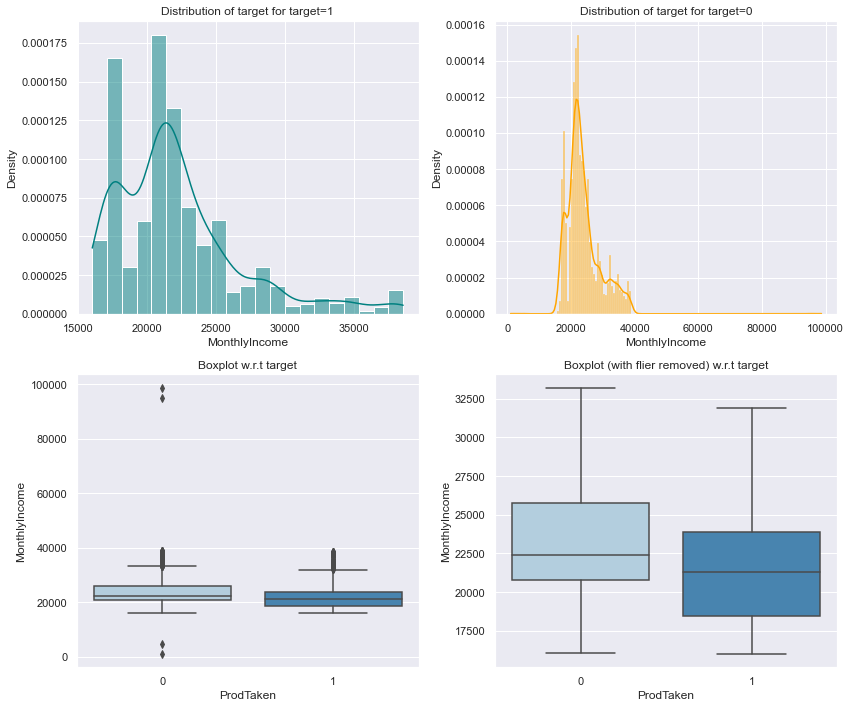

In [ ]:
distribution_plot_wrt_target(tmp_data, "MonthlyIncome", "ProdTaken")
# look at the individual cont. distributions, non log transform 

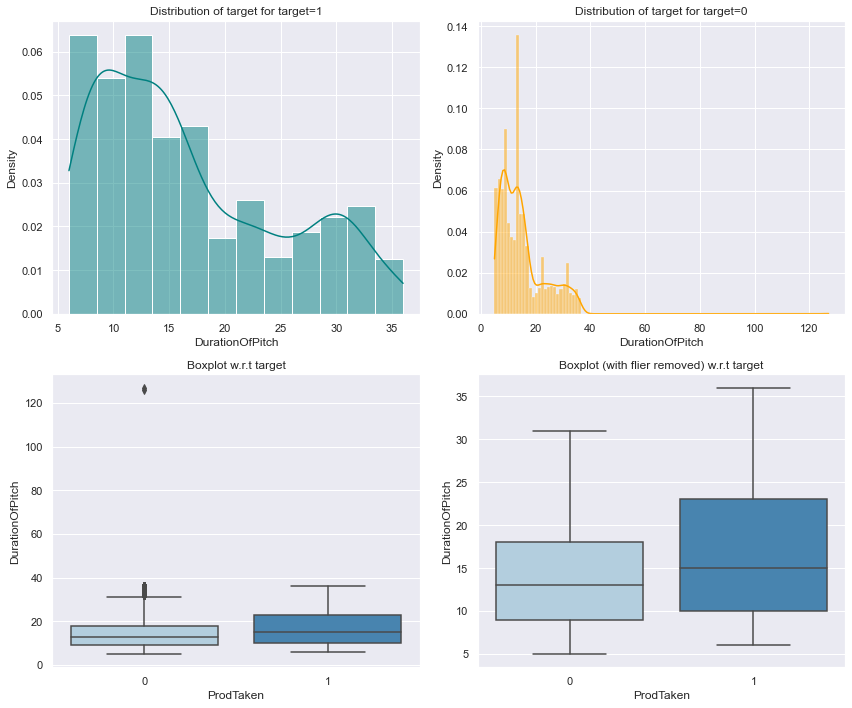

In [ ]:
distribution_plot_wrt_target(tmp_data, "DurationOfPitch", "ProdTaken")

In [ ]:
# looking at the distribution plots and box plots, the majority(25 -75% tile) of the clients that have purchased 
# the vacation package have had a pitch from 10-25 min long.


In [ ]:
# identify if there are duplicates in the customer id column, if not then this column can be dropped
# because this wont help the model or make a difference.

is_duplicate = data['CustomerID'].duplicated().any()
if is_duplicate == False:
    print("no duplicate values in CustomerID")
    
elif is_duplicate == True:
    print("there are duplicate values keep CustomerID")

no duplicate values in CustomerID


In [ ]:
# after looking at the customer id column, it will provide no predictive value so this column will be dropped
tmp_data.drop("CustomerID", axis = 1, inplace = True)

In [ ]:
# Looking at the univariate analysis we can see that the duration of pitch and the Monthly Income is skewed and 
# needs to be transformed to normaliize the data.
#

In [ ]:


# create column list of outlier columns
outlier_list = ["NumberofTrips", "MonthlyIncome" ]

In [ ]:
# create list of columns to transform 
col_transform = ["MonthlyIncome", "DurationOfPitch"]

### 6) Transform data if needed
- Define list of columns that need log transform to normalize data
- Define new column name with + "_log" on it to clearly identify lof transformed columns
- Rerun eda to look at data after transform

In [ ]:
for colname in col_transform:
    tmp_data[colname + '_log'] = np.log(tmp_data[colname] + 1)
tmp_data.drop(col_transform, axis=1, inplace=True)

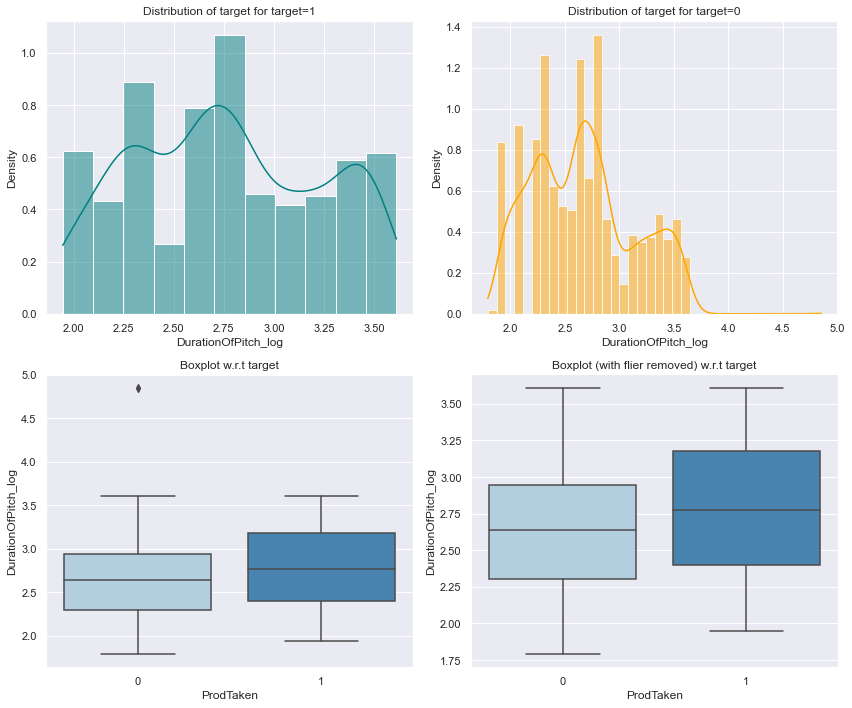

In [ ]:
distribution_plot_wrt_target(tmp_data, "DurationOfPitch_log", "ProdTaken")

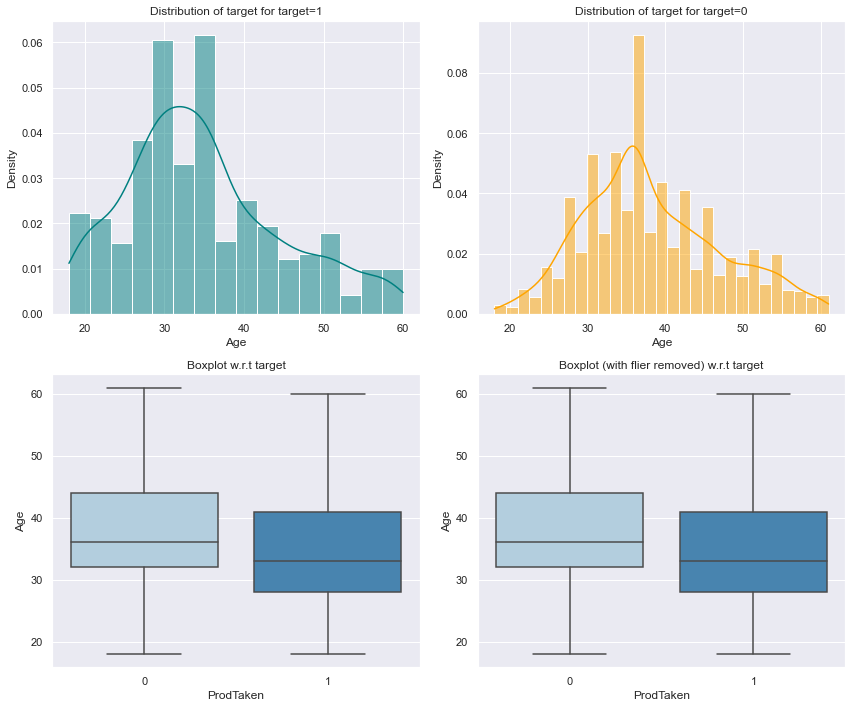

In [ ]:
distribution_plot_wrt_target(tmp_data, "Age", "ProdTaken")

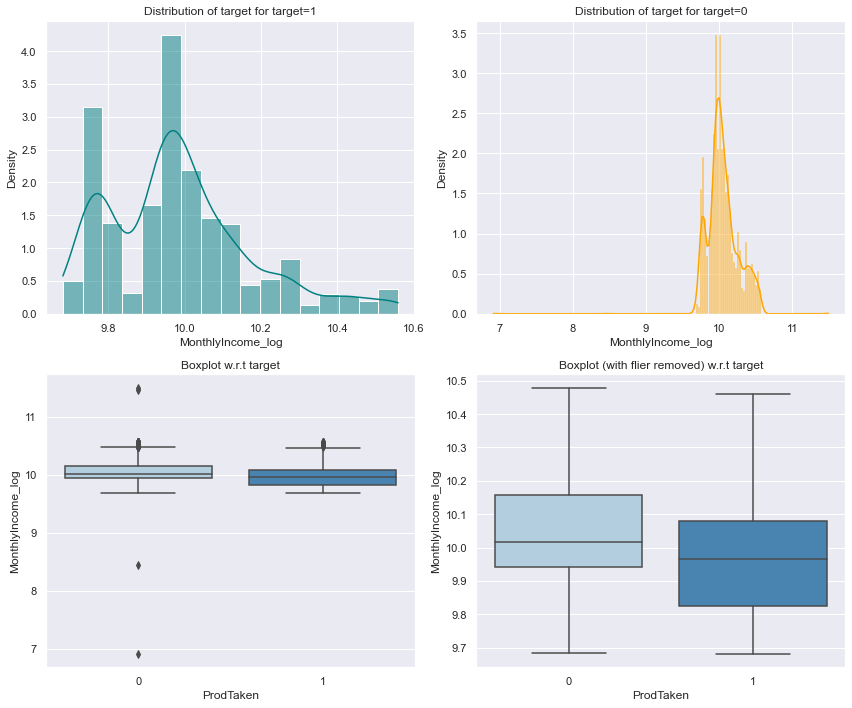

In [ ]:
distribution_plot_wrt_target(tmp_data, "MonthlyIncome_log", "ProdTaken")

In [ ]:
# Process outliers in data to remove them and re run eda graphs

    
income_quartiles =np.quantile(tmp_data['MonthlyIncome_log'][tmp_data['MonthlyIncome_log'].notnull()], [.25, .75])
income_quartiles_iqr = 4 * (income_quartiles[1] - income_quartiles[0])

In [ ]:
income_quartiles_iqr

0.8640827858622373

In [ ]:
# define the outlier

income_outlier = tmp_data.loc[np.abs(tmp_data["MonthlyIncome_log"]-tmp_data["MonthlyIncome_log"].median()) > income_quartiles_iqr, "MonthlyIncome_log"]



In [ ]:
len(income_outlier)

4

In [ ]:
tmp_data.drop(income_outlier.index, axis = 0, inplace = True)

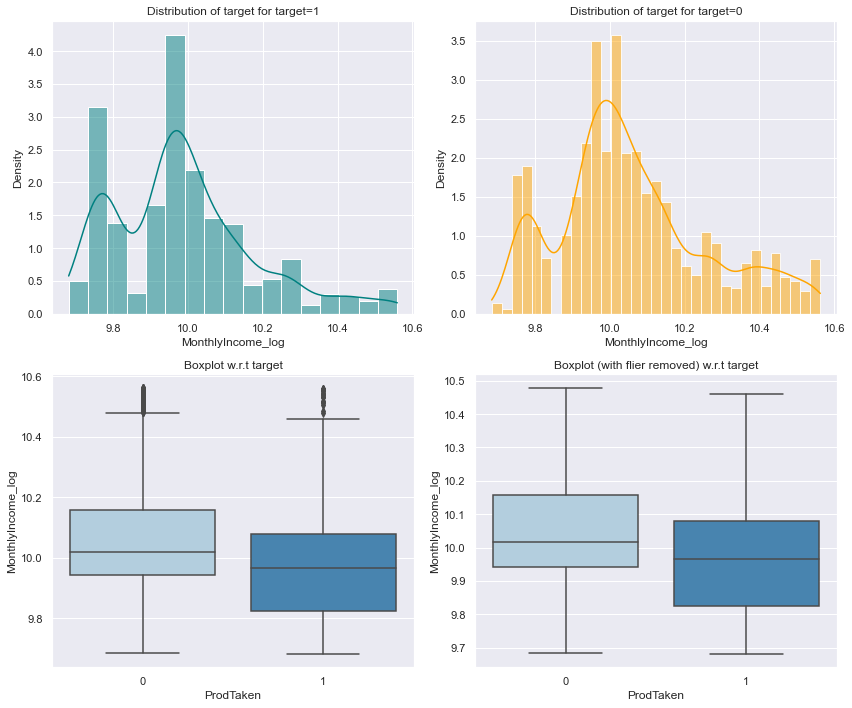

In [ ]:
# run eda after processing outliers

distribution_plot_wrt_target(tmp_data, "MonthlyIncome_log", "ProdTaken")

In [ ]:
# remove outliers from duration of pitch too 
pitch_quartiles =np.quantile(tmp_data['DurationOfPitch_log'][tmp_data['DurationOfPitch_log'].notnull()], [.25, .75])
pitch_quartiles_iqr = 4 * (pitch_quartiles[1] - pitch_quartiles[0])

In [ ]:
pitch_outlier = tmp_data.loc[np.abs(tmp_data["DurationOfPitch_log"]-tmp_data["DurationOfPitch_log"].median()) > pitch_quartiles_iqr]

In [ ]:
tmp_data.drop(pitch_outlier.index, axis = 0, inplace = True)

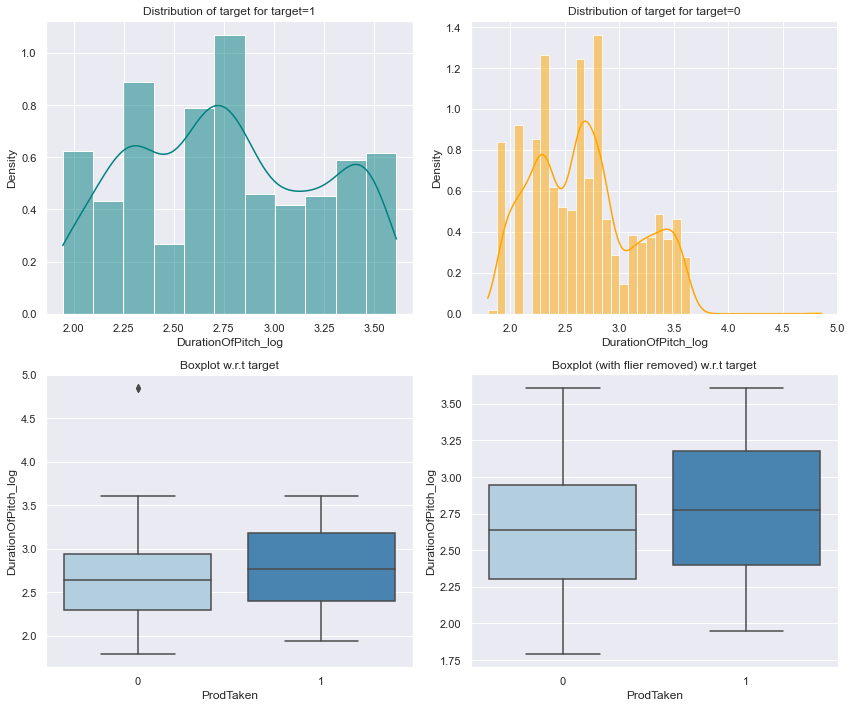

In [ ]:
# Run eda after removal of outliers

distribution_plot_wrt_target(tmp_data, "DurationOfPitch_log", "ProdTaken")

In [ ]:
### Define function for stacked barplots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    
    )
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# plot correlation matrix
corr_data = pd.concat([tmp_data['DurationOfPitch_log'], tmp_data['MonthlyIncome_log'],tmp_data['NumberOfTrips'], tmp_data['Age'], 
                            tmp_data["ProdTaken"]], axis=1, )

In [ ]:
# corr matrix before only using continous columns
corr_matrix2= tmp_data.corr()

In [ ]:
corr_matrix = corr_data.corr()

In [ ]:
# look at the correlation between each variable
def make_corr_matrix(corr_matrix):

    fig, ax = plt.subplots(figsize= (15,10))
    ax = sns.heatmap(corr_matrix, 
                    annot = True,
                    linewidths=0.5,
                    fmt= ".2f",
                    cmap= "YlGnBu");
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - 0.5)
    plt.show()

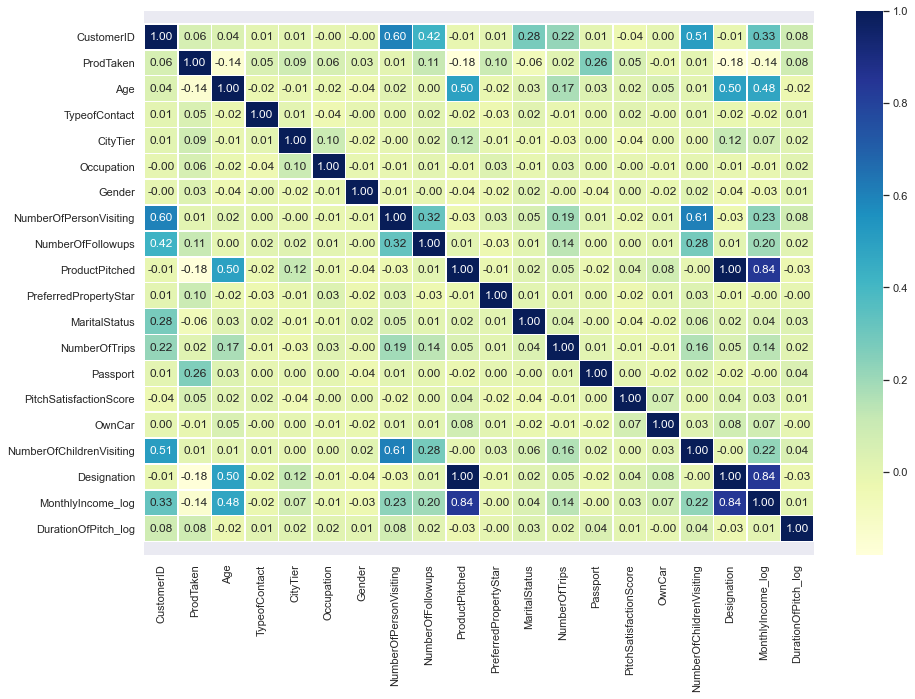

In [ ]:
# correlation matrix before categorical non continous variables filtered out 
make_corr_matrix(corr_matrix2)

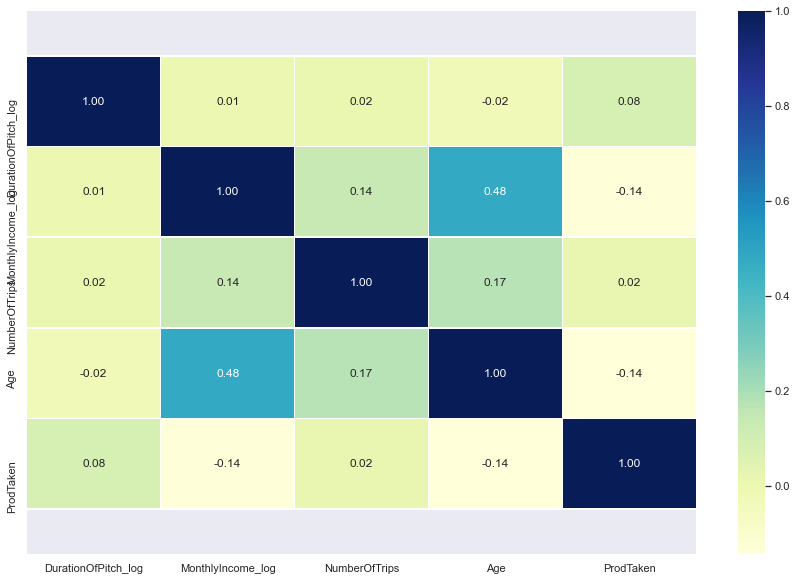

In [ ]:
# removed all categorical value variables that weren't continous variables. All discrete categorical variables have 
# been removed to simplify 
make_corr_matrix(corr_matrix)

In [ ]:
#sns.pairplot(data,hue='ProdTaken')
#plt.show()

ProdTaken         0    1   All
TypeofContact                 
All            3964  920  4884
1.0            2855  610  3465
2.0            1109  310  1419
------------------------------------------------------------------------------------------------------------------------


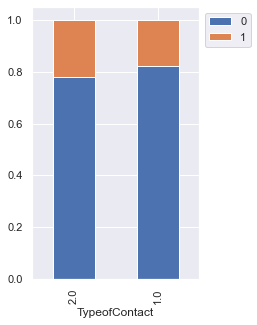

ProdTaken      0    1   All
Occupation                 
All         3964  920  4884
1           1952  414  2366
2           1700  384  2084
3            312  120   432
4              0    2     2
------------------------------------------------------------------------------------------------------------------------


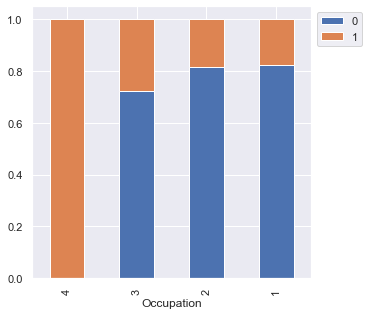

ProdTaken     0    1   All
Gender                    
All        3964  920  4884
2          2338  578  2916
1          1626  342  1968
------------------------------------------------------------------------------------------------------------------------


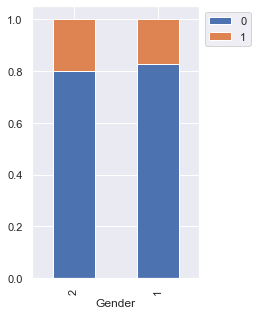

ProdTaken          0    1   All
ProductPitched                 
All             3964  920  4884
0               1288  552  1840
1               1526  204  1730
2                618  124   742
3                322   20   342
4                210   20   230
------------------------------------------------------------------------------------------------------------------------


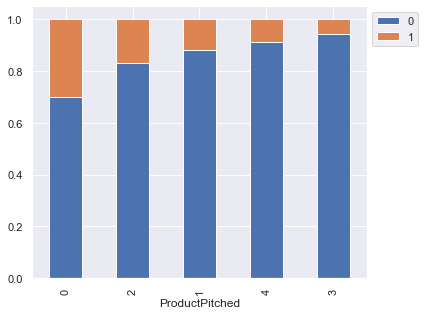

ProdTaken         0    1   All
MaritalStatus                 
All            3964  920  4884
4              2014  326  2340
2               610  304   914
3               516  166   682
1               824  124   948
------------------------------------------------------------------------------------------------------------------------


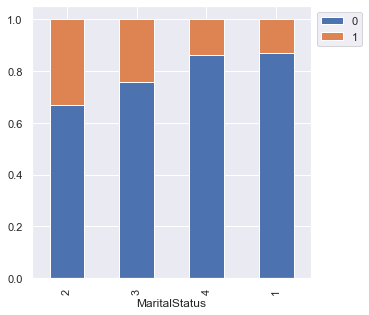

ProdTaken       0    1   All
Designation                 
All          3964  920  4884
1            1288  552  1840
2            1526  204  1730
3             618  124   742
4             322   20   342
5             210   20   230
------------------------------------------------------------------------------------------------------------------------


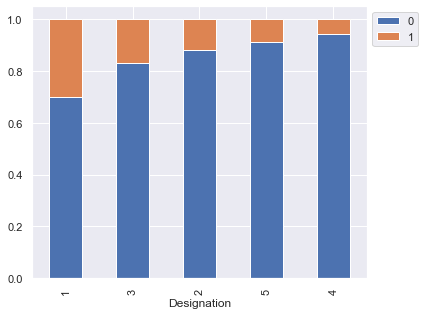

In [ ]:
categorical_variables
for i in categorical_variables:
    stacked_barplot(tmp_data,i,"ProdTaken")

In [ ]:
cat_list = [ 'TypeofContact', 'CityTier',
        'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

In [ ]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
TypeofContact,4863.0,1.291795,0.454635,1.0,1.00,1.0,2.00,2.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
Occupation,4888.0,1.605155,0.647349,1.0,1.00,2.0,2.00,4.0
Gender,4888.0,1.596563,0.490637,1.0,1.00,2.0,2.00,2.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0


ProdTaken         0    1   All
TypeofContact                 
All            3964  920  4884
1.0            2855  610  3465
2.0            1109  310  1419
------------------------------------------------------------------------------------------------------------------------


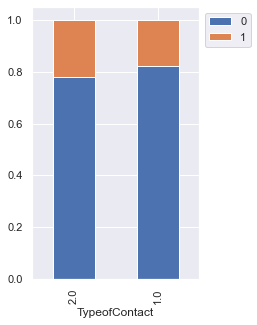

ProdTaken     0    1   All
CityTier                  
All        3964  920  4884
1          2666  520  3186
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


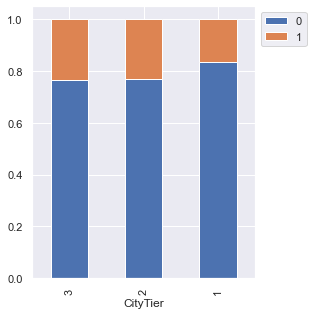

ProdTaken      0    1   All
Occupation                 
All         3964  920  4884
1           1952  414  2366
2           1700  384  2084
3            312  120   432
4              0    2     2
------------------------------------------------------------------------------------------------------------------------


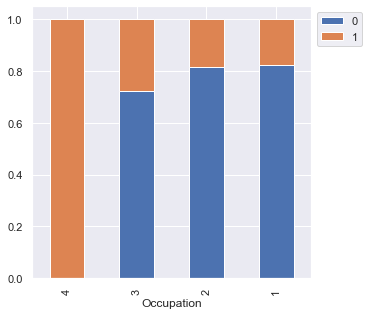

ProdTaken     0    1   All
Gender                    
All        3964  920  4884
2          2338  578  2916
1          1626  342  1968
------------------------------------------------------------------------------------------------------------------------


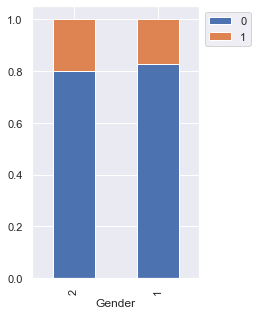

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3964  920  4884
3                       1940  460  2400
2                       1149  267  1416
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


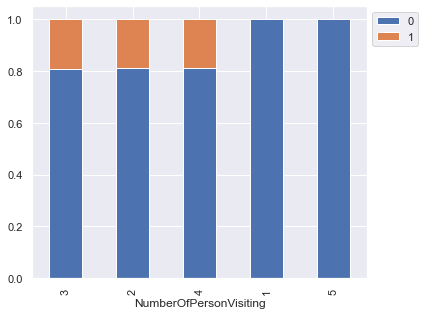

ProdTaken             0    1   All
NumberOfFollowups                 
All                3964  920  4884
4.0                1724  387  2111
3.0                1221  244  1465
5.0                 576  191   767
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


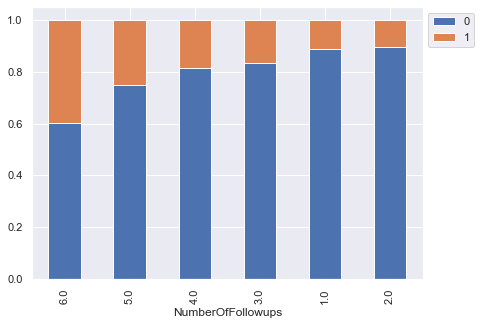

ProdTaken          0    1   All
ProductPitched                 
All             3964  920  4884
0               1288  552  1840
1               1526  204  1730
2                618  124   742
3                322   20   342
4                210   20   230
------------------------------------------------------------------------------------------------------------------------


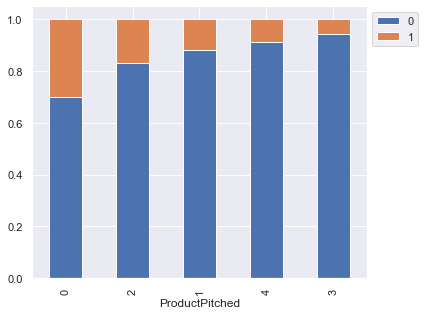

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3964  920  4884
3.0                    2528  488  3016
5.0                     705  250   955
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


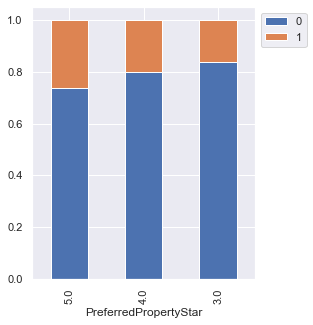

ProdTaken         0    1   All
MaritalStatus                 
All            3964  920  4884
4              2014  326  2340
2               610  304   914
3               516  166   682
1               824  124   948
------------------------------------------------------------------------------------------------------------------------


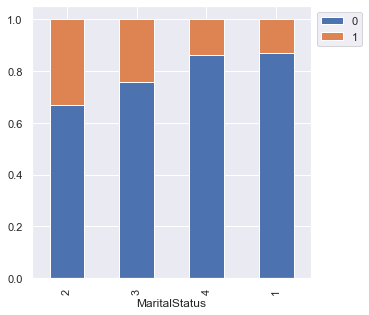

ProdTaken         0    1   All
NumberOfTrips                 
All            3964  920  4884
2.0            1164  299  1463
3.0             990  229  1219
1.0             507  112   619
6.0             258   64   322
5.0             395   62   457
7.0             156   62   218
4.0             416   61   477
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


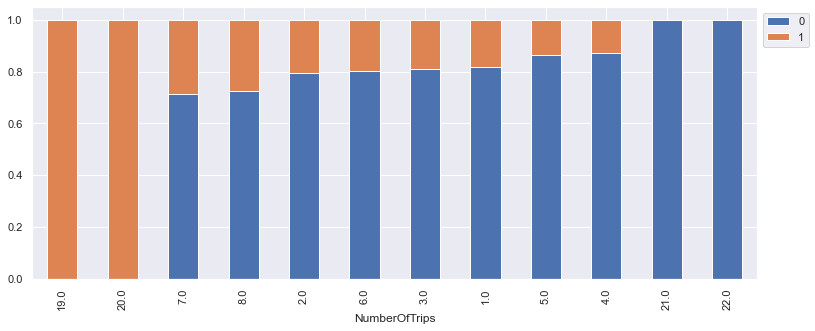

ProdTaken     0    1   All
Passport                  
All        3964  920  4884
1           924  494  1418
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


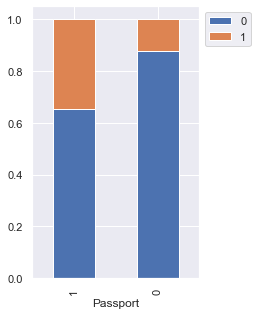

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3964  920  4884
3                       1162  316  1478
5                        758  210   968
4                        750  162   912
1                        798  144   942
2                        496   88   584
------------------------------------------------------------------------------------------------------------------------


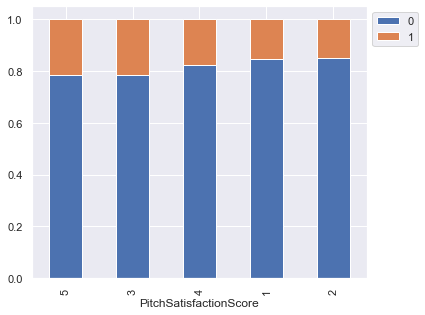

ProdTaken     0    1   All
OwnCar                    
All        3964  920  4884
1          2470  560  3030
0          1494  360  1854
------------------------------------------------------------------------------------------------------------------------


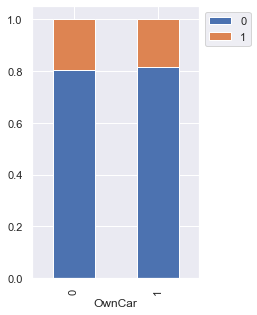

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3964  920  4884
1.0                       1745  399  2144
2.0                       1082  253  1335
0.0                        878  202  1080
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


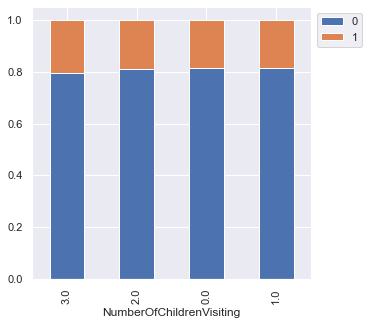

ProdTaken       0    1   All
Designation                 
All          3964  920  4884
1            1288  552  1840
2            1526  204  1730
3             618  124   742
4             322   20   342
5             210   20   230
------------------------------------------------------------------------------------------------------------------------


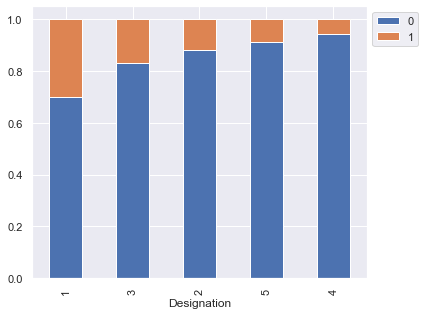

In [ ]:
for i in cat_list:
    stacked_barplot(tmp_data,i,"ProdTaken")

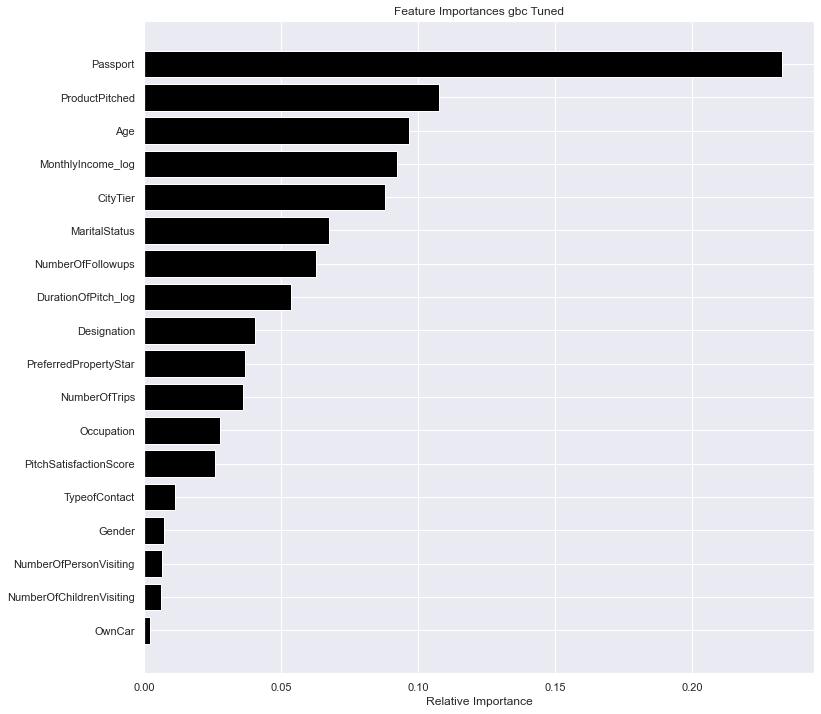

In [ ]:
# plot feature importances of abc boost tuned

feature_names = X_train.columns
importances = gbc_tuned_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances gbc Tuned')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
### conclusions

- look at the top 5 feature and explore the EDA graphs for them 



### EDA insights
- Insights for EDA
-	 From looking at the only continuous variables(Monthly_Income_log, Duration_Of_Pitch_log, age
	Age :
-	The median and mean ages are pretty close in the dataset, no extreme values are present within the histogram
-	The IQR is from 31 to 43 , the majority of the customer base relies within this range, marketing team should focus there efforts within this age interval
-	Duration_of_Pitch_log:
	The mean and median values are very close 2.68(14.58) mean and 2.64(14) median. The log transform improved the slight skewness of this data. The IQR is from 2.30 to 3(9.97 to 20), the sales team shouldn’t make pitches anymore than 20 minutes and nothing less than 10 min to assure adequate information being displayed to the possible customer 
-	There are outliers present in the data, a instance of a pitch lasting 115.6 minutes, we will process this out as this was an extreme case . The model shouldn’t process this because we would be learning from extreme data and that wouldn’t be and ideal situation for the model to learn from. 
	Monthly_Income_log:
-	The mean and median values after the transformation are very close, 10.04($22,925.38) to 10.14($25,3363.47) 
 - The IQR Is from 9.93($25,3363.47) to 10.14($25,3363.47), marketing team should primarily focus building 
Vacation packages that would suit this income group as this is where the majority of the customers will be possibly determined from. 
	Customer Profile for Vacation Package
-	71 % of the possible customers are from company invited segment
-	93 % of the possible purchasers are from the salaried and small business occupation, the marketing team should focus on targeting these two groups of customers.
-	 60% of the possible customers are Male
-	Approx 73% of the product pitched are the basic and deluxe vacation packages
-	Approx 50% of the possible customers are Married, while the remaining are divorced single or unmarried 
-	Approx 73 % of the possible customers are either Executive or Manager level in their current role
-	The duration of pitch for the majority of the customers that ended up purchasing a vacation package were from 10-20 min long, perhaps if the sale person would extend the 
Pitch for the consumers that didn’t purchase the package they could have ended up getting a sale. Perhaps some more training for the sales team would be a good idea to
Make sure they convey all of the sales topics to their possible client. 

-	Monthly income for the majority of the clients that purchased the package (IQR ) is form $20,952 to $56,954 approx. 
-	The majority customers that ended up purchasing a package had a pitch lasting 11 to 24 min
-	Of the customers that purchase the product, the clients that are vp level purchase the package 100% of the time. The marketing team should try and capture more of the other occupations to increase sales revenue. The marketing team should try and work with the sales team to help them convert the other clients with the remaining roles in the list(Manager,Sr. Mgr. , and AVP).
-	Vacation packages basic, standard, and deluxe are of the 3 most popular that the clients have purchased. It appears from the product pitched the conversion rate of customers are low. The sales team may need some more training to achieve a better conversion rate. The basic package  has a conversion rate of 30% and the rest are worse than that. The other packages range from 06 to 17% sales conversion rate. 
-	The clients that purchase these packages are mostly from the single and unmarried segments. The lowest are from the divorced and married segments. 
-	The top 3 customers are of the executive, manager and enior mgr roles, the AVP and VP roles have a lower conversion rate , as there are less people in those roles just because of company hierarchy.



### 7) Define functions for model analyis 
 - Confusion Matrix
 - Scoring function to display metrics of parameters

### Model Evaluation Criteria

- the model can predict improperly if the client will purchase the wellness vacation package
 - The model can predict that the client will purchase a vacation package and client actually doesn't purchase it (false pos)
 - The model can predict that the client won't purchase a vacation package and the client does(false neg)
 
- in the case of this scenario we would want to minimize false positives , so we will focus on precision
- for the subsequent models as this will give us the best secnario for our business case

In [ ]:
# Define Confusion Matrix to plot
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# define function for model scores 


def get_model_metrics(model, flag=True):
    #model : classifier to predict values of X 
        
    metrics_list = []
    
    pred_train = model.predict(X_train)
    pred_test= model.predict(X_test)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    metrics_list.extend((train_acc,test_acc,train_recall,test_recall,
                       train_precision,test_precision)
                       )
    
     
    if flag == True: 
            print("Accuracy on training set : ",model.score(X_train,y_train))
            print("Accuracy on test set : ",model.score(X_test,y_test))
            print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
            print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
            print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
            print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    #define data frame of all metrics  
    # make data frame to compare to
    df_metrics = pd.DataFrame({
    "Train_Accuracy": train_acc, "Test_Accuracy" : test_acc, "Train_Recall": train_recall, 
                 "Test_Recall": test_recall, "Train_Precision":train_precision, "Test_Precision":test_precision
     },index=[1])
    
    
    return df_metrics

### 8) Define feature matrices & Split model into testing and training data

In [ ]:
# define feature matrices

X = tmp_data.drop("ProdTaken",axis=1)
y= tmp_data["ProdTaken"]

In [ ]:
X.shape

(4884, 18)

In [ ]:
y.shape

(4884,)

In [ ]:
### define train test and split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = .3, random_state= 1, stratify =y)

### 9) Instantiate model, fit and score base models, then compare each one with dataframe
- Run base models for bagging classifiers with base estimators as decision tree and randomforest classifier
- Hypertune bagging model
- Model building Boosting
- Hypertune models

In [ ]:
# Instantiate bagging Classifier model
simp_bc_rf = BaggingClassifier(base_estimator=RandomForestClassifier())
simp_bc_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
simp_bc_rf.fit(X_train, y_train)


BaggingClassifier(base_estimator=RandomForestClassifier())

In [ ]:
simp_bc_dt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
get_model_metrics(simp_bc_dt, flag= False)

   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.993563        0.90382      0.965839     0.615942              1.0   

   Test_Precision  
1        0.829268  


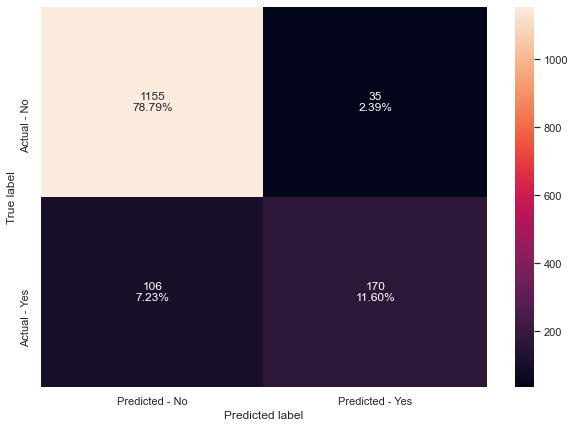

In [ ]:
make_confusion_matrix(simp_bc_dt,y_test)

### Insights
- on the base model decision tree the model predicts the clients purchasing the vacation only 
- 170 times out of the 276 possible clients
- A high difference in the test recall and train recall means the model is overfitting the data 
greatly

In [ ]:
get_model_metrics(simp_bc_rf,flag= False)

   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1         0.97718       0.885402      0.878882     0.442029              1.0   

   Test_Precision  
1        0.897059  


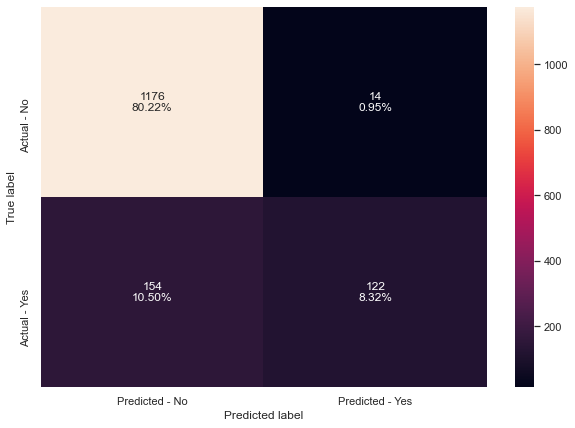

In [ ]:
make_confusion_matrix(simp_bc_rf,y_test)

In [ ]:
# looking at the model we are only predicting 122 out of the possible 276 clients 
# appropriately to purchase the vacation package
# the data is still being overfit becuase of the large difference between training and 
# testing data

### hypertuning the model 

In [ ]:
# hypertuning the model
# Set class weight accordingly  
# hyper tune the bagging classifier model (decisionTreeModel)
# 

### Determine class weights to account for class imblanace in the target variable

- Use value counts for each class value and set class weight to 1- classweight for each class
- for example class weight for value 1 in target variable will be set by 1- (count of class value 1/total value count)
the opposite will be used for 0 class.

In [ ]:
counter = y.value_counts()
print(counter)

0    3964
1     920
Name: ProdTaken, dtype: int64


In [ ]:
counter[0],counter[1]

(3964, 920)

In [ ]:
# percentage of each target 
print("percentage of class 0 is", counter[0]/counter.sum()*100 )

percentage of class 0 is 81.16298116298117


In [ ]:
# percentage of each target 
print("percentage of class 1 is", counter[1]/counter.sum()*100 )

percentage of class 1 is 18.83701883701884


In [ ]:
#set class weight for each class to 1 - percentage
class_weight_0 = 1- (counter[0]/counter.sum())
class_weight_1 = 1- (counter[1]/counter.sum())

In [ ]:
class_weight_0

0.18837018837018837

In [ ]:
class_weight_1

0.8116298116298116

In [ ]:
import time

In [ ]:
# assign class weight to the o and 1 class of the ProdTaken Target predictor variable, which 
# has been assigned y as our predictor variable for the classifier

# use time object to calculate time elapsed to run code 
start = time.time()

# instantiate the bagging classifier model with the appropriate class weights as define above

decision_tree_estimator_bc = DecisionTreeClassifier(class_weight={0:class_weight_0,1:class_weight_1},random_state=1)

# define parameters to pass to GridsearchCV for hypertuning
# this will exhaustively look  for all combinations and then 
# we will use best_estimator_ to obtain the optimum parameters
parameters = {

    'max_depth': np.arange(2,20,1),
    "min_samples_leaf" : [1,2,5,10],
    'max_leaf_nodes' : np.arange(1,10,1),
    'min_impurity_decrease': [0.0001,0.001,0.01,0.1]

}

# optimize the model for precision_score as we are interested in this metric for the given dataset
scorer = metrics.make_scorer(metrics.precision_score)


grid_obj = GridSearchCV(decision_tree_estimator_bc,parameters, scoring =scorer )
end = time.time()
print(end-start)

0.0


In [ ]:
start = time.time()
grid_obj.fit(X_train, y_train)
# set the classifier model to best parameters
decision_tree_estimator = grid_obj.best_estimator_
# fit the decision tree est. to the best estimator
decision_tree_estimator.fit(X_train, y_train)
end = time.time()
print(end-start)

163.9888882637024


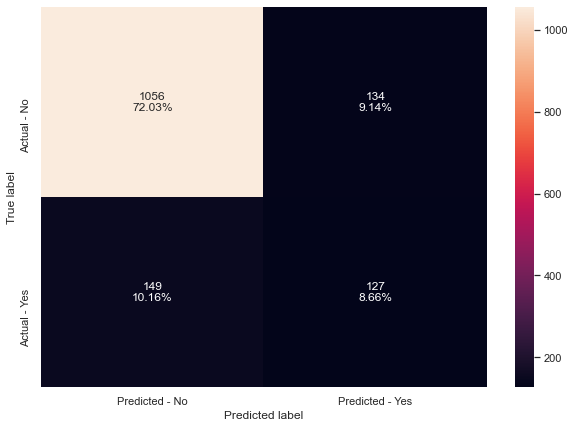

In [ ]:
make_confusion_matrix(decision_tree_estimator, y_test)

In [ ]:
get_model_metrics(decision_tree_estimator,flag= False)

   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.779111       0.783765      0.628882     0.623188         0.439739   

   Test_Precision  
1        0.446753  


### Insights
- The hypertuned model isn't overfitting the data as we see the train and test metrics close 
to eachother in value. The recall score has increased about 9% so it's an improvemnt in the 
right direction. We will tune the randomforest classifier and see how it does as well
- out of all the possible postive predictions this model is truely predicting 127 correctly out of the 261 
possible outcomes

In [ ]:
get_model_metrics(simp_bc_dt)

Accuracy on training set :  0.9923932124049152
Accuracy on test set :  0.8963165075034106
Recall on training set :  0.9627329192546584
Recall on test set :  0.5833333333333334
Precision on training set :  0.9967845659163987
Precision on test set :  0.8131313131313131
   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.992393       0.896317      0.962733     0.583333         0.996785   

   Test_Precision  
1        0.813131  


In [ ]:
# tuning the bagging classifier with using the decision tree as base estimator.


start = time.time()

param_grid = {
              'base_estimator':[decision_tree_estimator_bc],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1],
              #"max_samples": [int,float],
              #"n_jobs": [1,-2]
 # trying to run with additional hyperparameters took my comp too long and crashed, model performance could increase or
    #get worse with the additional parameters that are commented out
    
    
}

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'precision', cv = 5)
grid.fit(X_train, y_train)

end = time.time()

print(start-end)

-30.781842470169067


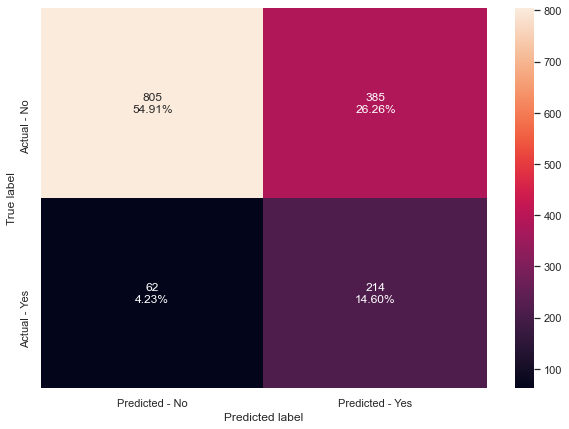

In [ ]:
make_confusion_matrix(grid,y_test)

In [ ]:
# the model isn't predicting customer that have decided to purchase the vacation package out of the 
# total clients it predicted to purchasse the vacation package only 133 out of 
# 276 were predicted appropriately

In [ ]:
get_model_metrics(grid, flag= False)

   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.708075       0.775362      0.708075     0.775362         0.325947   

   Test_Precision  
1        0.357262  


In [ ]:
get_model_metrics(simp_bc_dt, flag = False)

   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.993563        0.90382      0.965839     0.615942              1.0   

   Test_Precision  
1        0.829268  


### Insights on Decision Tree(stock) vs Bagging Classifier using decision Tree as base estimator

- With adding class weights to the model the test recall has declined and the accuracy has 
greatly decreased. 
- We are still over fitting the data and the accuracy is getting worse with the hyperparmeter tuning



In [ ]:
### Hypertuning Random Forest Classifier


In [ ]:
start = time.time()

parameters = {
               "n_estimators": [110,251,501],
               "min_samples_leaf": np.arange(1, 6,1),
               "max_features": [0.7,0.9,'log2','auto'],
               "max_samples": [0.7,0.9,None],
    
    
    
}

rf_grid = GridSearchCV(RandomForestClassifier(class_weight= {0:class_weight_0,1:class_weight_1}, random_state=1,bootstrap=True), 
                       param_grid=param_grid, scoring = 'precision', cv = 5)
rf_grid= grid.fit(X_train, y_train)

# set the clf to the best combo of parameters 
rf_grid_estimator = rf_grid.best_estimator_

rf_grid_estimator.fit(X_train,y_train)

end = time.time()

print(end-start)

30.936123609542847


In [ ]:
get_model_metrics(rf_grid_estimator,flag=False)


   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.669105       0.695089      0.708075     0.775362         0.325947   

   Test_Precision  
1        0.357262  


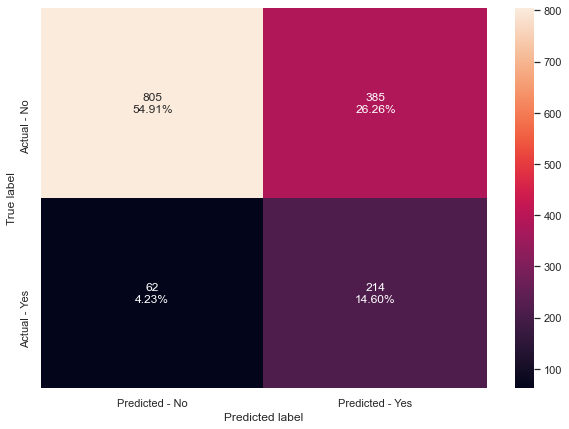

In [ ]:
make_confusion_matrix(rf_grid_estimator,y_test)

In [ ]:
# looking at the results of the random forest hypertuned model the 
# model is performing poorly with respect to predicting the actual true positives 
# the false positives are very high , as we are seeing 385 of them in the test data

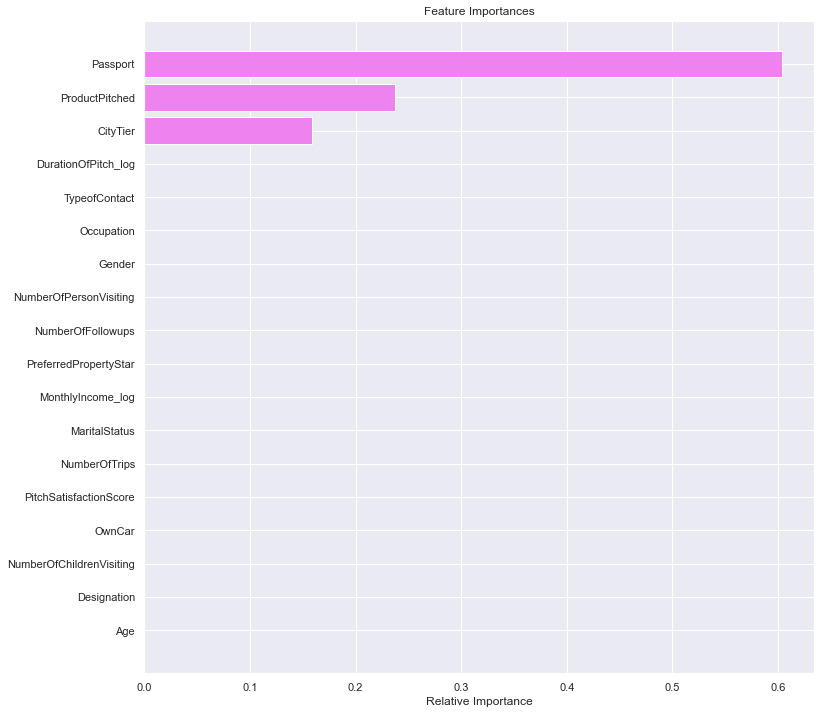

In [ ]:
# Plot feature importance 
feature_names = X_train.columns
importances = decision_tree_estimator.feature_importances_

# define the indices to plot the feature importances by sorting the importances defined above.
# feature importances of the model were accesed by using the .feature_importances_ class
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
# define title on graph

plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
# use a bar graph to plot each index value in the indices, which plots the feature importance 
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# label the y axis with each item in the indices array
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# in this model the variables  with the high feature importance are product pitched , city_tier and Passport. 
# these variables have the highest amount of impact with the model.

In [ ]:
# data has been severly overfitted with bagging classifier using decision tree as a base estimator

### Instantiate Boosting models
- Adaboost 
- Gradient Boost
- Xgboost

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)


AdaBoostClassifier(random_state=1)

In [ ]:
get_model_metrics(abc)

Accuracy on training set :  0.8510825043885313
Accuracy on test set :  0.8356070941336972
Recall on training set :  0.34006211180124224
Recall on test set :  0.31521739130434784
Precision on training set :  0.7227722772277227
Precision on test set :  0.6258992805755396
   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.851083       0.835607      0.340062     0.315217         0.722772   

   Test_Precision  
1        0.625899  


In [ ]:
# the base abc model, is performing much better than the hypertuned random forest, test precision is 
# 65%. We are capturing more of the true positives and minimizing the false negatives with this model.

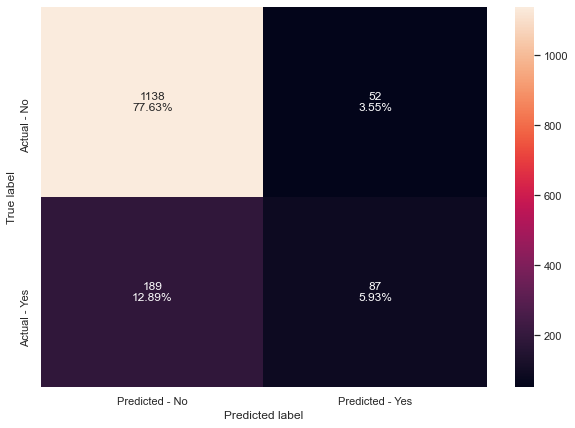

In [ ]:
make_confusion_matrix(abc,y_test)

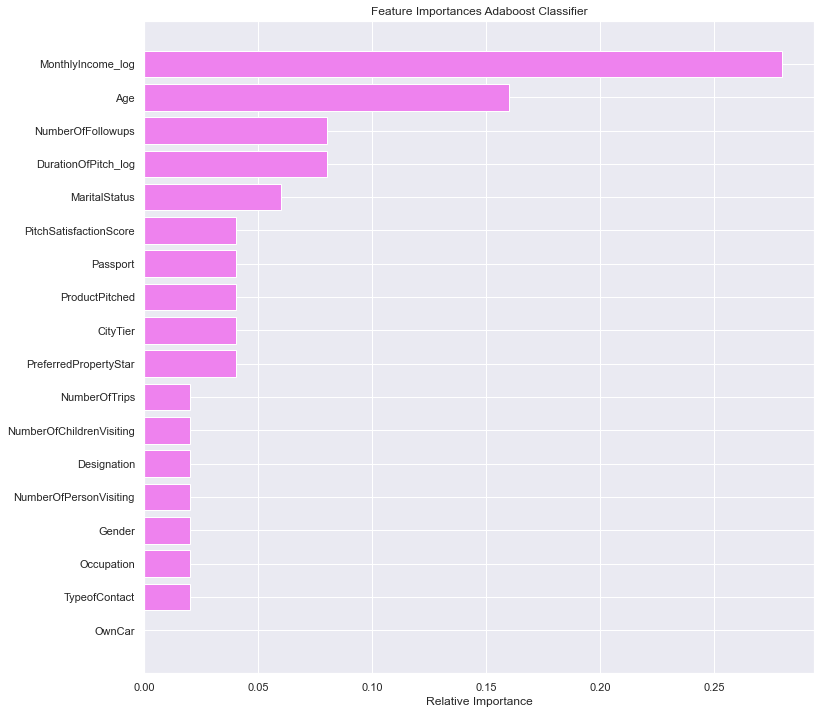

In [ ]:
# plot feature importace of the ada boost estimator 

# Plot feature importance 
feature_names = X_train.columns
importances = abc.feature_importances_

# define the indices to plot the feature importances by sorting the importances defined above.
# feature importances of the model were accesed by using the .feature_importances_ class
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances Adaboost Classifier')
# define title on graph

plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
# use a bar graph to plot each index value in the indices, which plots the feature importance 
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# label the y axis with each item in the indices array
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# in this model the highest 3 features that affect the model the most are Monthly income, age, and number of follow ups

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
get_model_metrics(gbc)

Accuracy on training set :  0.8856056173200703
Accuracy on test set :  0.8635743519781719
Recall on training set :  0.4642857142857143
Recall on test set :  0.4057971014492754
Precision on training set :  0.8666666666666667
Precision on test set :  0.7567567567567568
   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.885606       0.863574      0.464286     0.405797         0.866667   

   Test_Precision  
1        0.756757  


In [ ]:
# the model has improved with precison 10% as compared to the adaboost classifier. The gradient boosting method is 
# improving the ability to minimize the false negatives. This makes sense because it applies a gradient that is differentiable
# to each model iteration as it works through the possible models in the agorithm. 

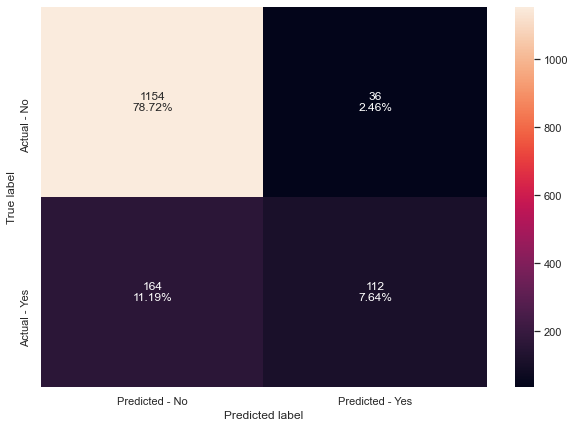

In [ ]:
make_confusion_matrix(gbc, y_test)

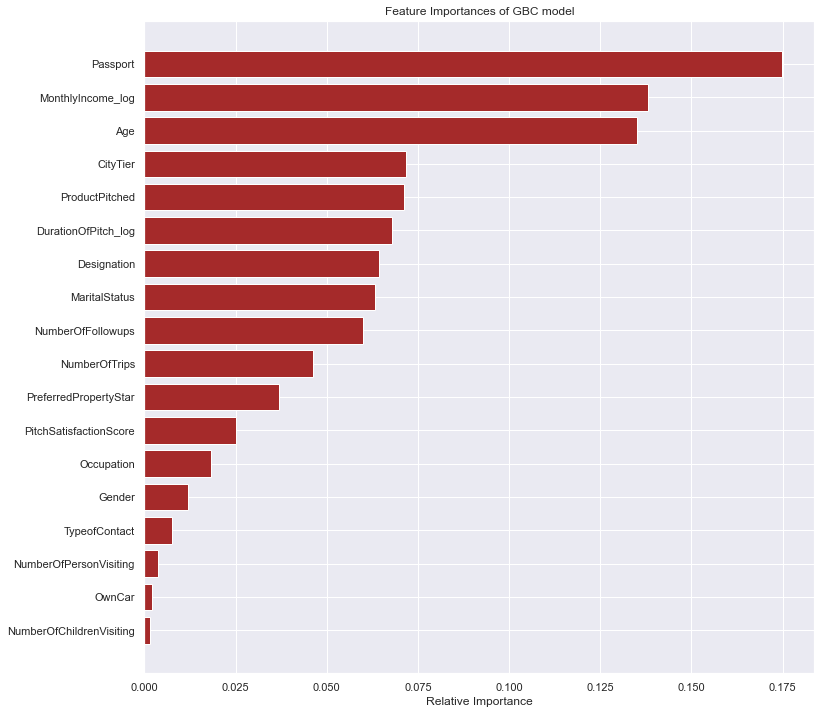

In [ ]:
# plot feature importance of GBC model 
# Plot feature importance 
feature_names = X_train.columns
importances = gbc.feature_importances_

# define the indices to plot the feature importances by sorting the importances defined above.
# feature importances of the model were accesed by using the .feature_importances_ class
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances of GBC model')
# define title on graph

plt.barh(range(len(indices)), importances[indices], color='brown', align='center')
# use a bar graph to plot each index value in the indices, which plots the feature importance 
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# label the y axis with each item in the indices array
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# the same features affect the model as compared to the adaboost. This makes sense as they both use decision trees as 
# base models

In [ ]:
xgb_estimator=XGBClassifier(random_state=1)
xgb_estimator.fit(X_train,y_train)

[01:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
get_model_metrics(xgb_estimator)

Accuracy on training set :  0.9991222937390287
Accuracy on test set :  0.9140518417462483
Recall on training set :  0.9953416149068323
Recall on test set :  0.6630434782608695
Precision on training set :  1.0
Precision on test set :  0.8472222222222222
   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.999122       0.914052      0.995342     0.663043              1.0   

   Test_Precision  
1        0.847222  


In [ ]:
# the base xg boost seems to be overfitting the data greatly and capturing a lot of noise, but it is minimizing the 
# false positives well. With hypertuning this model could perform better and be the best option.

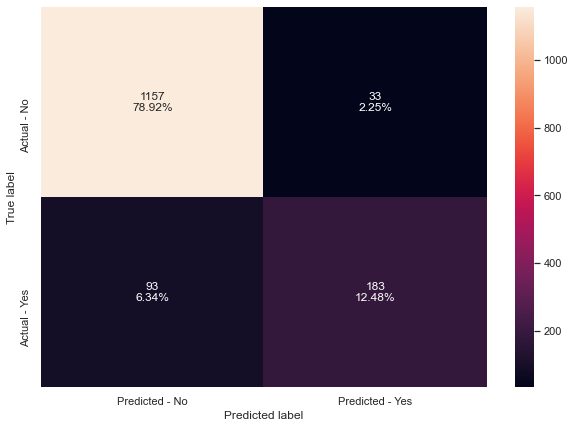

In [ ]:
make_confusion_matrix(xgb_estimator,y_test)

In [ ]:
print(pd.DataFrame(xgb_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Passport                  0.152927
ProductPitched            0.136020
MaritalStatus             0.078435
CityTier                  0.074596
Age                       0.055051
NumberOfFollowups         0.054458
DurationOfPitch_log       0.049491
Occupation                0.049225
NumberOfTrips             0.048987
Gender                    0.045813
PreferredPropertyStar     0.045649
PitchSatisfactionScore    0.045457
TypeofContact             0.041358
MonthlyIncome_log         0.037821
OwnCar                    0.030890
NumberOfPersonVisiting    0.027817
NumberOfChildrenVisiting  0.026004
Designation               0.000000


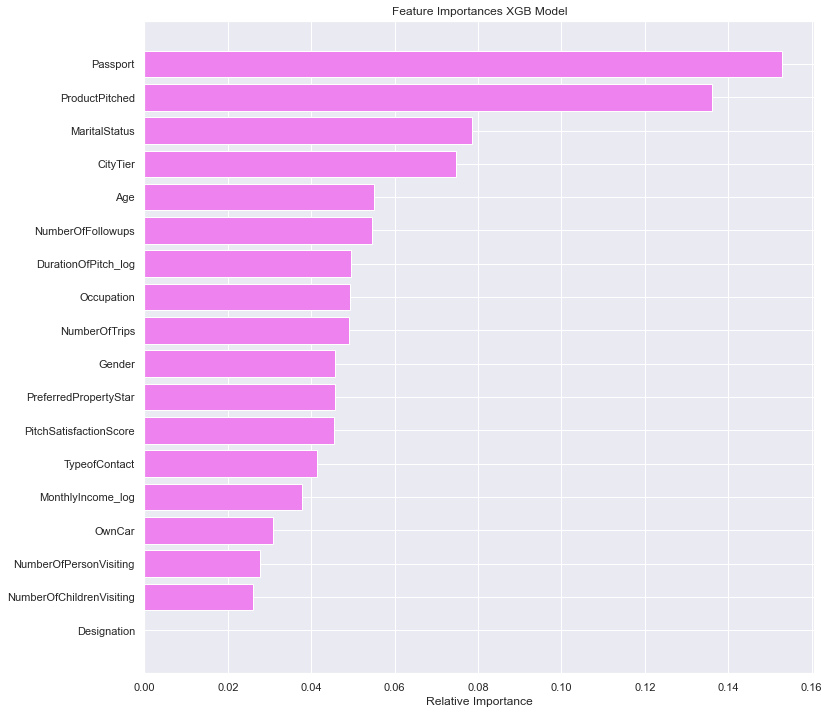

In [ ]:
feature_names = X_train.columns
importances = xgb_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances XGB Model')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# the features that are highly important with predicting sales output of vacation packages are product pitched, passport,and
# marital status 

### Hyperparameter tuning for boosting models

- Hypertune ABC Boosting Model

- Hypertune GBC Boosting Model

- Make insights on the two

In [ ]:
# abc boosting hyperparameter tuning 

# define parameter grid for dict of hyperparameters
start =time.time()

abc_tuned = AdaBoostClassifier(random_state=1)

dt1 = DecisionTreeClassifier(class_weight= {0:class_weight_0,1:class_weight_1}, max_depth=1,random_state=1)
dt2 = DecisionTreeClassifier(class_weight= {0:class_weight_0,1:class_weight_1}, max_depth=2,random_state=1)
dt3 = DecisionTreeClassifier(class_weight= {0:class_weight_0,1:class_weight_1}, max_depth=3,random_state=1)
est_list = [dt1,dt2,dt3]
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":est_list,
    "n_estimators": np.arange(10,100,10),
    "learning_rate":np.arange(0.1,2,0.2)
}


#Define the precision scorer to optimize the model on precision

precision_scorer = metrics.make_scorer(metrics.precision_score)

# run the grid search with the parameter grid 

abc_grid = GridSearchCV(abc_tuned, parameters, scoring = precision_scorer, cv = 5)

# fit the tuned model on the training data
abc_grid = abc_grid.fit(X_train, y_train)

# set the model to the best parameters 

abc_tuned = abc_grid.best_estimator_
#abc_tuned_params = abc_grid

# fit the best algorithm to the data 

abc_tuned.fit(X_train, y_train)
end = time.time()
print(end-start)

454.8014678955078


In [ ]:
abc_grid.best_params_
# view the best parameters of the hypertuned model

{'base_estimator': DecisionTreeClassifier(class_weight={0: 0.18837018837018837,
                                      1: 0.8116298116298116},
                        max_depth=3, random_state=1),
 'learning_rate': 1.3000000000000003,
 'n_estimators': 90}

In [ ]:
get_model_metrics(abc_tuned)

Accuracy on training set :  0.9751316559391457
Accuracy on test set :  0.8656207366984994
Recall on training set :  0.984472049689441
Recall on test set :  0.7137681159420289
Precision on training set :  0.8942172073342737
Precision on test set :  0.6253968253968254
   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.975132       0.865621      0.984472     0.713768         0.894217   

   Test_Precision  
1        0.625397  


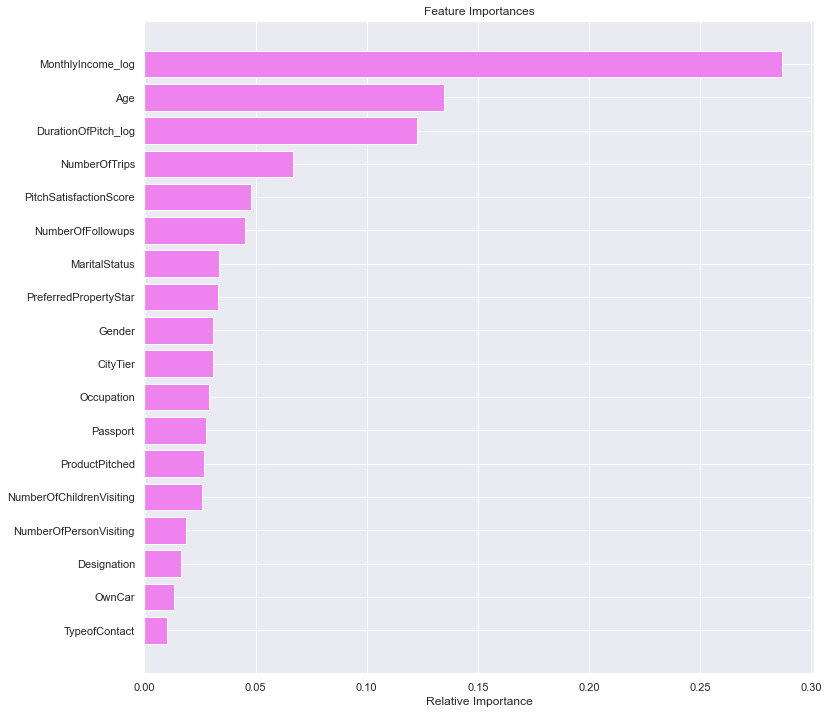

In [ ]:
# plot feature importances of abc boost tuned

feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# with the abc hypertuned model the important features that affect the model predictions the most are monthly income, age and 
# duration of pitch

In [ ]:
### hypertune Gradient Boosting Classifier

# use adaboost classifier as an intial model

gbc_initial = GradientBoostingClassifier(init = AdaBoostClassifier(random_state=1), random_state=1 )
gbc_initial.fit(X_train,y_train)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [ ]:
gbc_initial_model_score = get_model_metrics(gbc_initial, flag= False)

   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.885898       0.861528      0.458075     0.391304         0.877976   

   Test_Precision  
1        0.755245  


In [ ]:

start = time.time()
gbc_tuned_estimator = GradientBoostingClassifier(init = AdaBoostClassifier(random_state=1), random_state=1 )

# define the parameter grid of all hyperparameters to choose from 

parameters = {
    #"loss": ['deviance', 'exponential'],
    "n_estimators": [50,100,150,200,250],
    "subsample":[0.8,0.9,1],
    #"min_samples_split": np.arange(1,5,1),
    "max_features":[0.7,0.8,0.9,1],
    "learning_rate" : np.arange(0.1,2,0.2)
    # using all the hyperparameters caused too high of a  
    
}


scorer = metrics.make_scorer(metrics.precision_score)
grid_obj = GridSearchCV(gbc_tuned_estimator, parameters, scoring = scorer, cv =5 )
gbc_tuned_estimator = grid_obj.fit(X_train, y_train)
# set model to best params

gbc_tuned_estimator = gbc_tuned_estimator.best_estimator_

gbc_tuned_estimator.fit(X_train,y_train )

end = time.time()
print("running time is", end-start)

running time is 2379.795400619507


In [ ]:
# get parameters for tuned model
grid_obj.best_params_

{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 50, 'subsample': 1}

In [ ]:
get_model_metrics(gbc_tuned_estimator, flag= False)

   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.838209       0.830832      0.149068     0.115942         0.950495   

   Test_Precision  
1        0.888889  


In [ ]:
# This is the best performing model the precision score is the highest 
# this model minimizes the false positives the best. 

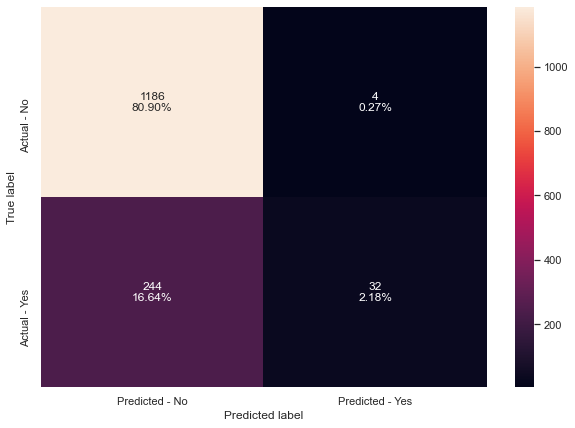

In [ ]:
make_confusion_matrix(gbc_tuned_estimator, y_test)

### compare all the models together in one df to compare performance

- use pd.concat to compile df of all separate dfs to easily compare each model performance and 
determine insights from

In [ ]:
 

simp_bagging_df_score = get_model_metrics(simp_bc_dt, flag = False)
simp_rf_df_score = get_model_metrics(simp_bc_rf, flag = False)
rand_forest_tuned = get_model_metrics(rf_grid_estimator,flag=False)
abc_df = get_model_metrics(abc,flag=False)
gbc_gf = get_model_metrics(gbc,flag=False)
xgboost_df = get_model_metrics(xgb_estimator,flag=False)
abc_tuned_df = get_model_metrics(abc_tuned,flag=False)
gbc_tuned_df = get_model_metrics(gbc_tuned_estimator,flag=False)                                   

   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.993563        0.90382      0.965839     0.615942              1.0   

   Test_Precision  
1        0.829268  
   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.984494       0.887449      0.917702     0.452899              1.0   

   Test_Precision  
1        0.899281  
   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.669105       0.695089      0.708075     0.775362         0.325947   

   Test_Precision  
1        0.357262  
   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.851083       0.835607      0.340062     0.315217         0.722772   

   Test_Precision  
1        0.625899  
   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.885606       0.863574      0.464286     0.405797         0.866667   

   Test_Precision  
1        0.7567

In [ ]:
df_score_list = [

simp_bagging_df_score,
simp_rf_df_score,
rand_forest_tuned,
abc_df,
gbc_gf ,
xgboost_df,
abc_tuned_df,
gbc_tuned_df]

In [ ]:
# make functions to display performance data

def model_perf_classification(model, predictors, target):
    
    # look at precision,recall, accuracy and F1 score
    
    pred = model.predict(predictors)
    
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target,pred)
 
# create df perf metrics

    df_metrics = pd.DataFrame({
    "Accuracy": acc, "Recall": recall, "Precision":precision,
        "f1": f1}, index=[0]
    )
    return df_metrics

In [ ]:
bagging_score_df = model_perf_classification(simp_bc_dt,X_test,y_test)
simp_rf_df = model_perf_classification(simp_bc_rf,X_test,y_test)
rand_forest_tuned_df = model_perf_classification(rf_grid_estimator,X_test,y_test)
abc_score_df = model_perf_classification(abc,X_test,y_test)
gbc_score_df = model_perf_classification(gbc,X_test,y_test)
xgboost_score_df = model_perf_classification(xgb_estimator,X_test,y_test)
abc_tuned_score_df = model_perf_classification(abc_tuned,X_test,y_test)
gbc_tuned_score_df =model_perf_classification(gbc_tuned_estimator,X_test,y_test)



 



In [ ]:
# compare all five models in dataframe  
model_test_comp_df = pd.concat(
[bagging_score_df.T, simp_rf_df.T,
 rand_forest_tuned_df.T,abc_score_df.T,
 gbc_score_df.T, xgboost_score_df.T,abc_tuned_score_df.T,
 gbc_tuned_score_df.T
 
    ], axis = 1, 
)

In [ ]:
model_test_comp_df.columns = [
    "Bagging_Decision_tree",
    "random forest simple","Random forest tuned","AdaBoost Classifier", "Gradient Boost Classifier","Xgboost",
"Adaboost tuned", "Gradient Boost tuned"
]

In [ ]:
model_test_comp_df

,Bagging_Decision_tree,random forest simple,Random forest tuned,AdaBoost Classifier,Gradient Boost Classifier,Xgboost,Adaboost tuned,Gradient Boost tuned
Accuracy,0.903820,0.887449,0.695089,0.835607,0.863574,0.914052,0.865621,0.830832
Recall,0.615942,0.452899,0.775362,0.315217,0.405797,0.663043,0.713768,0.115942
Precision,0.829268,0.899281,0.357262,0.625899,0.756757,0.847222,0.625397,0.888889
f1,0.706861,0.602410,0.489143,0.419277,0.528302,0.743902,0.666667,0.205128


In [ ]:
get_model_metrics(gbc_tuned_estimator)

Accuracy on training set :  0.8382094792276185
Accuracy on test set :  0.8308321964529332
Recall on training set :  0.14906832298136646
Recall on test set :  0.11594202898550725
Precision on training set :  0.9504950495049505
Precision on test set :  0.8888888888888888
   Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  \
1        0.838209       0.830832      0.149068     0.115942         0.950495   

   Test_Precision  
1        0.888889  


In [ ]:
# insights 

# the best model is the gradient boost that is hypertuned. It optimized precsion and recall was quite low. 
# the traning and testing data were quite close with all of the metrics.
# the metric for this case we are interested in is the precision becuase we want to minimize false positives


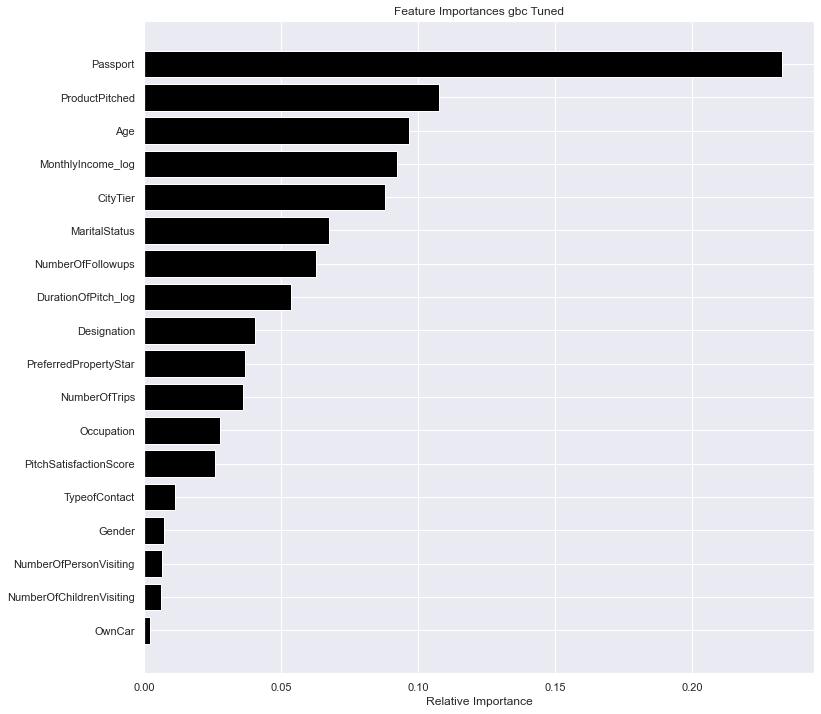

In [ ]:
# plot feature importances of abc boost tuned

feature_names = X_train.columns
importances = gbc_tuned_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances gbc Tuned')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### conclusion

- using the GBC Tuned model the conclusions for the business to improve on would be the following 

- The marketing team should focus targeting clients that have passports as they have ~34% sales conversion 
rate
- they should focus on marketing the products basic, standard and deluxe packages, depending on the profit margins .
the marketing and sales team may want to reconfigure how they market each package to increase exposure of the other 
products to the future clients 
- The majority of the clients age are in the range of the 28 to 41 years old, marketing should focus on targeting that
age group as this had a high impact in model performance 
- Monthly was from ~ 19k to 24k per month, so these vacation packages are for high income, so disposable income 
is high so they may be able to upsale to a higher profting vacation package.
- The 2 and 3 city tier levels produce a the highest sales conversion rate out of the city tiers